# IN_SYS - SW13 Exercise 2

## Introduction to vector embeddings

### We will experiment here with word embeddings

In [1]:
import numpy as np
from dotenv import load_dotenv

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.decomposition import PCA

from openai import OpenAI

#### Here we need an OpenAI account and the api-key

In [2]:
# Load OpenAI API key
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# List of words to embed
words = ["Airport", "Airplane", "King", "Queen", "Female", "Male",  "Banana", "Peach", "run", "sleep", "waiting", "Man", "Woman"]

# Function to get embeddings for a word
def get_embedding(word, model="text-embedding-3-large"):
    response = client.embeddings.create(
        model=model,
        input=word,
        encoding_format="float"
    )
    return response.data[0].embedding 

# Generate embeddings for the list of words
embeddings = {word: get_embedding(word) for word in words}

# Display embeddings and dimensions
for word, vector in embeddings.items():
    print(f"Word: {word}")
    print(f"Vector: {vector[:10]}... (showing first 10 dimensions)")
    print(f"Number of dimensions: {len(vector)}\n")

Word: Airport
Vector: [-0.004179904, 0.06048712, 0.010097659, -0.028958704, -0.019536419, 0.006156607, -0.0008895165, 0.031643726, -0.017329099, -1.809726e-05]... (showing first 10 dimensions)
Number of dimensions: 3072

Word: Airplane
Vector: [-0.037164234, 0.003951573, -0.0008751805, -0.032178357, -0.025601242, -0.021004334, -0.010864615, 0.04303413, -0.00090335874, 0.030392634]... (showing first 10 dimensions)
Number of dimensions: 3072

Word: King
Vector: [0.0112240175, 0.013170149, -0.013066885, 0.0032865799, -0.0076415464, 0.013011281, 0.02821494, -0.010096055, 0.0061164144, 0.0364443]... (showing first 10 dimensions)
Number of dimensions: 3072

Word: Queen
Vector: [-0.020397954, 0.005612, -0.019665794, 0.011634009, -0.009269135, -0.007907319, 0.011289894, -0.011494898, -0.0034667735, -0.0013188017]... (showing first 10 dimensions)
Number of dimensions: 3072

Word: Female
Vector: [0.01222966, 0.010420823, 0.0024111157, 0.0048662517, 0.0040358678, 0.003461602, 0.0063509387, -0.015

In [3]:
# Function to calculate Cosine Similarity
def cosine_similarity(vector1, vector2):
    v1 = np.array(vector1)
    v2 = np.array(vector2)
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Pairs of words to compare
word_pairs = [
    ("King", "Queen"),
    ("Man", "Woman"),
    ("Queen", "Airplane"),
    ("Airplane", "Banana"),
    ("King", "Banana")
]

# Calculate and display similarities
for word1, word2 in word_pairs:
    vector1 = embeddings[word1]
    vector2 = embeddings[word2]
    similarity = cosine_similarity(vector1, vector2)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")

Cosine similarity between 'King' and 'Queen': 0.5469
Cosine similarity between 'Man' and 'Woman': 0.5910
Cosine similarity between 'Queen' and 'Airplane': 0.1882
Cosine similarity between 'Airplane' and 'Banana': 0.3329
Cosine similarity between 'King' and 'Banana': 0.2587


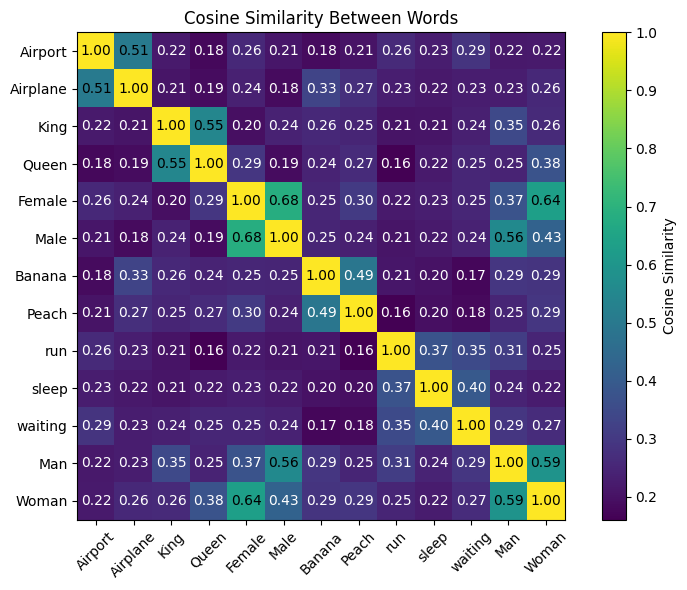

In [4]:
# Create a similarity matrix
similarity_matrix = np.zeros((len(words), len(words)))

for i, word1 in enumerate(words):
    for j, word2 in enumerate(words):
        similarity_matrix[i, j] = cosine_similarity(embeddings[word1], embeddings[word2])

# Plot the similarity matrix
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Cosine Similarity")
plt.xticks(ticks=range(len(words)), labels=words, rotation=45)
plt.yticks(ticks=range(len(words)), labels=words)
plt.title("Cosine Similarity Between Words")
plt.tight_layout()

# Show values on the matrix
for i in range(len(words)):
    for j in range(len(words)):
        plt.text(j, i, f"{similarity_matrix[i, j]:.2f}",
                 ha="center", va="center", color="white" if similarity_matrix[i, j] < 0.5 else "black")

plt.show()

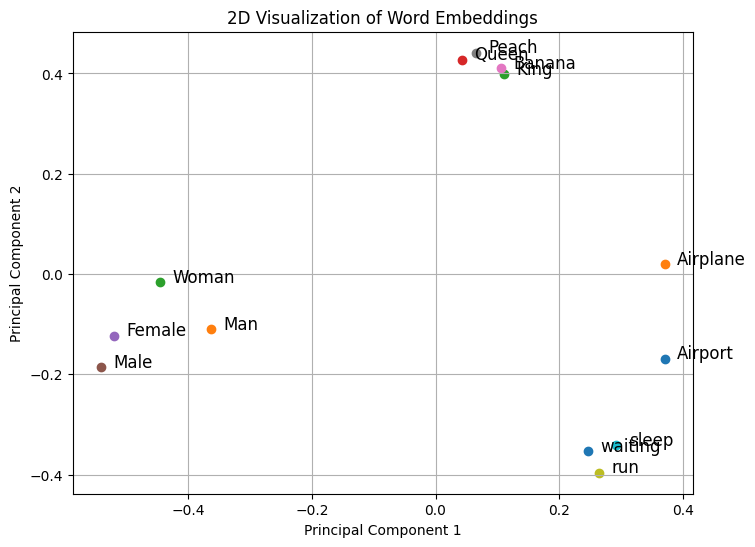

In [5]:
# Prepare data and labels
vectors = np.array([embeddings[word] for word in words])
labels = words

# Reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot the vectors
plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    x, y = reduced_vectors[i]
    plt.scatter(x, y, label=label)
    plt.text(x + 0.02, y, label, fontsize=12)

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.legend()
plt.grid()
plt.show()

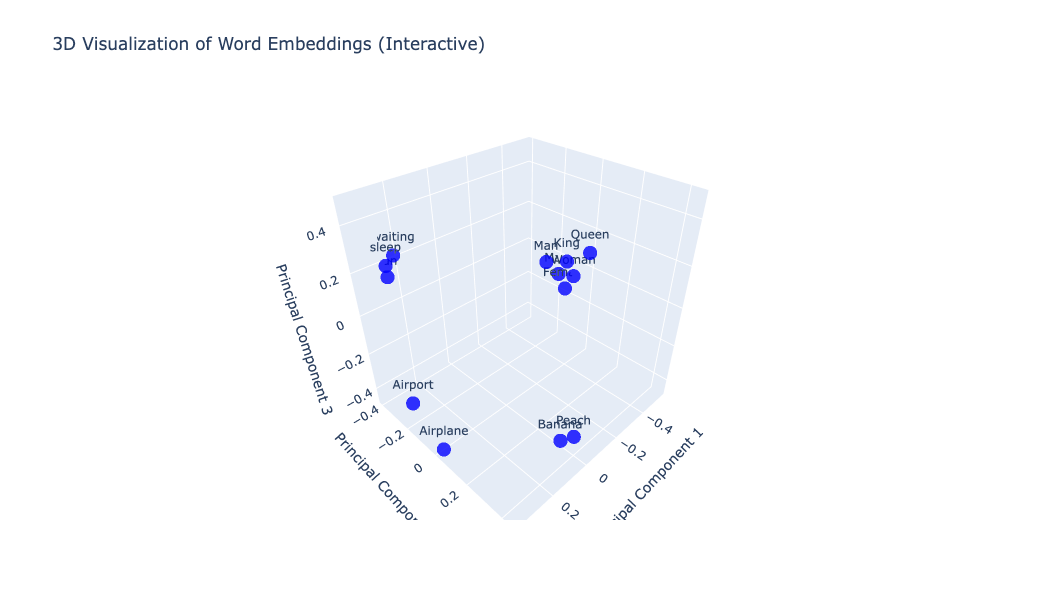

In [6]:
# Extract vectors and labels
words = list(embeddings.keys())
vectors = np.array([embeddings[word] for word in words])

# Perform PCA for 3D reduction
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

# Prepare data for interactive 3D plot
x, y, z = reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2]

# Create a Plotly 3D scatter plot
fig = go.Figure()

# Add word embeddings as scatter points
fig.add_trace(go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers+text',
    marker=dict(size=8, color='blue', opacity=0.8),
    text=words,
    textposition="top center"
))

# Add plot layout
fig.update_layout(
    title="3D Visualization of Word Embeddings (Interactive)",
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
        zaxis_title="Principal Component 3"
    ),
    width=800,  # Set the width of the plot in pixels
    height=600  # Set the height of the plot in pixels
)

# Show interactive plot
fig.show()